In [1]:
!pip install numpy
!pip install matplotlib

You should consider upgrading via the 'c:\users\임정호\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\임정호\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

random.seed(int('0xC0FFEE', 16))
np.random.seed(int('0xC0FFEE', 16))
PI = math.pi

## Numpy data load




In [3]:
### np.savez('./filename.npz', x=X, y=Y)

practice1_data = np.load('./practice1_data.npz')
print(f'Check key values: {practice1_data.files}')
X, Y = practice1_data['x'], practice1_data['y']
print(X.shape, Y.shape)
print(X[0:10], Y[0:10])

Check key values: ['x', 'y']
(1000,) (1000,)
[160.86429835 174.97366162 173.9137621  163.800405   190.03698413
 166.23929116 186.3450603  177.38916332 166.12647418 169.35983898] [1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


# Practice 1
평균, 시그마가 정해진 두 개의 클래스에서 1차원 데이터를 샘플링해서, 히스토그램과 확률분포 함수를 각각 그려보시오.

In [4]:
def show_histogram(A, B):
    plt.hist(A, label='a', alpha=0.5)
    plt.hist(B, label='b', alpha=0.5)
    plt.legend(loc='upper left')
    plt.show()

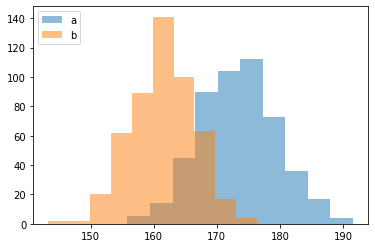

In [5]:
show_histogram(X[Y==0], X[Y==1])

In [6]:
def pdf(x, mean, std):
    return (1 / (std * np.sqrt(PI * 2))) * np.exp(-(1 / 2) * ((x - mean) / std) * ((x - mean) / std))

In [7]:
def show_pdf(x, Y_A, Y_B):
    plt.plot(x, Y_A, color='red', label='A')
    plt.plot(x, Y_B, color='blue', label='B')

    plt.legend(loc='upper left')
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
    plt.show()

In [8]:
x = np.linspace(140, 200, 1000)
Y_A = pdf(x, np.mean(X[Y==0]), np.std(X[Y==0]))
Y_B = pdf(x, np.mean(X[Y==1]), np.std(X[Y==1]))

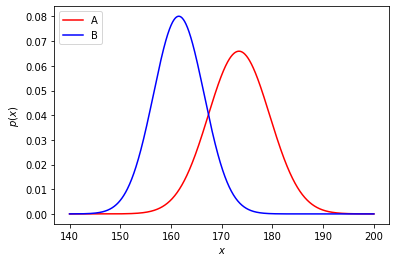

In [9]:
show_pdf(x, Y_A, Y_B)

# Practice 2

추가적으로 테스트 데이터를 샘플링해서, likelihood값만을 이용하는 경우, prior값과 결합하여 posterior로 볼 경우 각각에 대하여 분류 정확도를 보고하고 

(a) likelihood 함수를 그리고, 

(b) prior 적용 시, likelihood x prior 함수를 그리고,

(c) posterior =  likelihood x prior / p(x) 를 그리시오. 

prior의 변화에 따라 decision point를 그래프에서 대략적으로 읽고, prior에 따라서 분류 결과가 어떻게 변화하는지 설명하시오.

In [10]:
practice2_train = np.load('./practice2_train.npz')
print(f'Check key values: {practice2_train.files}')
X_train, Y_train = practice2_train['x'], practice2_train['y']
print(X_train.shape)

Check key values: ['x', 'y']
(1000,)


In [11]:
practice2_test = np.load('./practice2_test.npz')
print(f'Check key values: {practice2_test.files}')
X_test, Y_test = practice2_test['x'], practice2_test['y']
print(X_test.shape)

Check key values: ['x', 'y']
(100,)


In [12]:
def get_likelihood(x, A_mean, A_std, B_mean, B_std):
    return pdf(x, A_mean, A_std), pdf(x, B_mean, B_std)

In [13]:
def get_prior(A, B):
    prior_A = len(A)/ (len(A) + len(B))
    return (prior_A), (1 - prior_A)

In [14]:
def get_posterior(x, A_likelihood, B_likelihood, A_prior, B_prior):
    evidence = (A_likelihood * A_prior) + (B_likelihood * B_prior)
    
    return (A_likelihood * A_prior) / evidence, (B_likelihood * B_prior) / evidence

In [15]:
def get_accuracy(Y_test, A_prob, B_prob):
    y_pred = np.where(A_prob > B_prob, 0, 1)
    return len(np.where(y_pred == Y_test)[0]) / len(y_pred)

Acc: 0.86


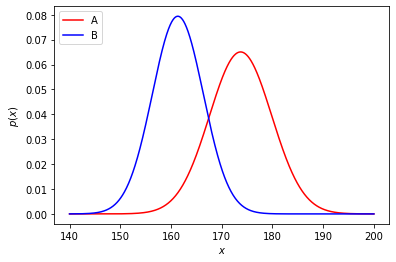

In [16]:
A_likelihood, B_likelihood = get_likelihood(X_test, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))

y_pred = np.where(A_likelihood > B_likelihood, 0, 1)

print(f'Acc: {get_accuracy(Y_test, A_likelihood, B_likelihood)}')


graph_x = np.linspace(140, 200, 1000)

A_graph_x, B_graph_x = get_likelihood(graph_x, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))
show_pdf(graph_x, A_graph_x, B_graph_x)

0.25 0.75
Acc: 0.83


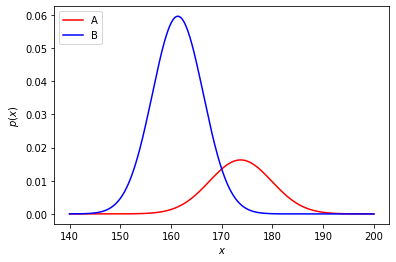

In [17]:
A_prior, B_prior = get_prior(X_train[Y_train==0], X_train[Y_train==1])

print(A_prior, B_prior)

print(f'Acc: {get_accuracy(Y_test, A_likelihood * A_prior, B_likelihood * B_prior)}')

show_pdf(graph_x, A_graph_x * A_prior, B_graph_x * B_prior)

Acc: 0.83


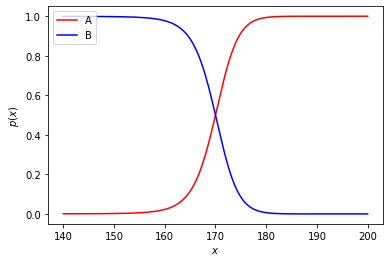

In [18]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, A_prior, B_prior)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')
A_graph_prob, B_graph_prob = get_posterior(X_test, A_graph_x, B_graph_x, A_prior, B_prior)

show_pdf(graph_x, A_graph_prob, B_graph_prob)

- prior_A: 0.5
- prior_B: 0.5

Acc: 0.86


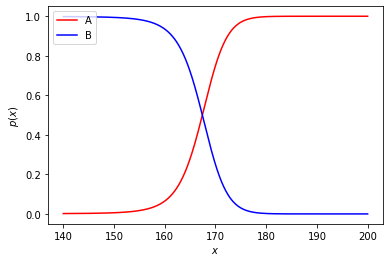

In [19]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.5, 0.5)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')


A_graph_prob, B_graph_prob = get_posterior(X_test, A_graph_x, B_graph_x, 0.5, 0.5)

show_pdf(graph_x, A_graph_prob, B_graph_prob)

- prior_A: 0.4
- prior_B: 0.6

In [20]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.3, 0.7)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.84


- prior_A: 0.25
- prior_B: 0.75

In [21]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.25, 0.75)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.83


# Question 1

위에서 prior probability를 0.5:0.5에서 0.25:0.75로 변화시키면서 Bayesian 분류기의 분류 정확도를 평가하였다.
세가지 경우에서 점점 정확도가 떨어지는 이유에 대하여 설명하시오. 

답 : Bayesian 분류기에서는 제공된 train 데이터의 상태가 특정 레이블의 출현 빈도수가 높을 경우, test 데이터를 특정 레이블으로 예측할 가능성이 높아진다. 단지 train 데이터에서 특정 레이블의 데이터 개수가 많다는 이유가 test 데이터 예측에 영향을 주기 때문이다.


# Practice 3
두 클래스의 평균 사이의 거리를 점차 증가시키면서 train, test 데이터를 샘플링하여 Bayesian 분류기의 정확도를 계산해보시오.

s = 3
mu = (-1, 1), (-2, 2), (-3, 3)
train / test sampling - report performance

In [22]:
def get_data(num_data, ratio, A_mean, A_std, B_mean, B_std):

    num_data_A = int(num_data * ratio)
    num_data_B = num_data - num_data_A

    A = np.random.normal(loc=A_mean, scale=A_std, size=num_data_A)
    B = np.random.normal(loc=B_mean, scale=B_std, size=num_data_B)
    label_zeros = np.zeros((num_data_A, 1))
    label_ones = np.ones((num_data_B, 1))
    
    return A, B, label_zeros, label_ones

In [23]:
import copy

# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 1, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -1, 3, 1, 3)
test_X = np.concatenate((test_A, test_B))

test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)
p3_1_A = copy.deepcopy(train_A)                       #practice 4번에 쓰일 데이터를 p3_1_A와 p3_1_B에 저장한다.
p3_1_B= copy.deepcopy(train_B)

Acc: 0.62


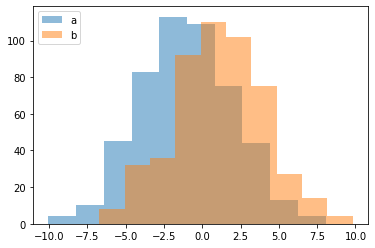

In [24]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)


In [25]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -2, 3, 2, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -2, 3, 2, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)
p3_2_A = copy.deepcopy(train_A)                      #practice 4번에 쓰일 데이터를 p3_2_A와 p3_2_B에 저장한다.
p3_2_B = copy.deepcopy(train_B)

Acc: 0.72


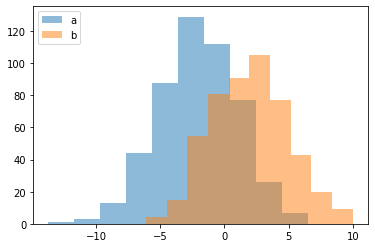

In [26]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

In [27]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -3, 3, 3, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -3, 3, 3, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)
p3_3_A = copy.deepcopy(train_A)                        #practice 4번에 쓰일 데이터를 p3_3_A와 p3_3_B에 저장한다.
p3_3_B = copy.deepcopy(train_B)

Acc: 0.87


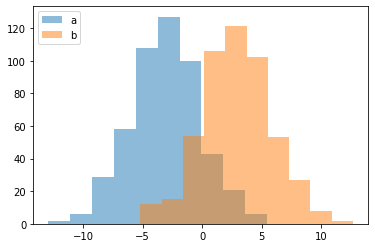

In [28]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

# Practice 4

Practice 3에서 그린 세 개의 히스토그램을 probability density function으로 그리시오.





practice 3의 첫 번째 데이터를 probability density function으로 그리면 다음과 같다.

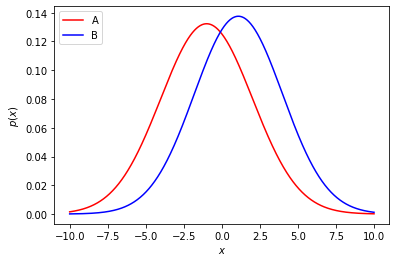

In [29]:

train_A= copy.deepcopy(p3_1_A)          #practice3에서 사용했던 데이터를 그대로 사용한다.
train_B= copy.deepcopy(p3_1_B)
x = np.linspace(-10,10,1000)            #그래프에 찍어낼 x의 범위는 -10~10이고, 개수는 1000개이다.

# train_A와 train_B의 pdf로 표현하기 위해, p(x|A)와 p(x|B)를 구한다. 
A,B = get_likelihood(x,np.mean(train_A),np.std(train_A),np.mean(train_B),np.std(train_B)) 
show_pdf(x,A,B)

practice 3의 두 번째 데이터를 probability density function으로 그리면 다음과 같다.

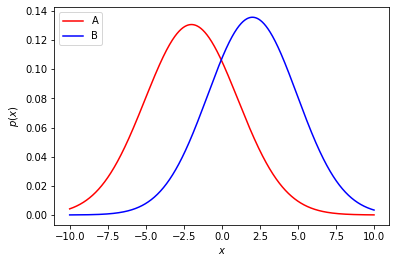

In [30]:

train_A= copy.deepcopy(p3_2_A)           #practice3에서 사용했던 데이터를 그대로 사용한다.
train_B= copy.deepcopy(p3_2_B)
x = np.linspace(-10,10,1000)            #그래프에 찍어낼 x의 범위는 -10~10이고, 개수는 1000개이다.
# train_A와 train_B의 pdf로 표현하기 위해, p(x|A)와 p(x|B)를 구한다. 
A,B = get_likelihood(x,np.mean(train_A),np.std(train_A),np.mean(train_B),np.std(train_B))
show_pdf(x,A,B)

practice 3의 세 번째 데이터를 probability density function으로 그리면 다음과 같다.

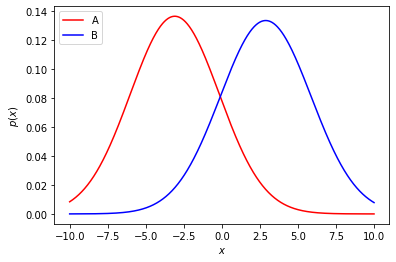

In [31]:
train_A= copy.deepcopy(p3_3_A)           #practice3에서 사용했던 데이터를 그대로 사용한다.
train_B= copy.deepcopy(p3_3_B)
x = np.linspace(-10,10,1000)            #그래프에 찍어낼 x의 범위는 -10~10이고, 개수는 1000개이다.

A,B = get_likelihood(x,np.mean(train_A),np.std(train_A),np.mean(train_B),np.std(train_B))
show_pdf(x,A,B)

# Practice 5

두 클래스의 데이터가 다음과 같은 Gaussian 분포를 따른다고 할 때, 아래 설명에 따라 Bayesian 분류기의 분류 정확도를 계산하시오. 

A class : mu = -1, s = 3
B class : mu = 3, s = 2

a) P(A)=P(B)일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

b) P(A)=1/3, P(B)=2/3일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

c) a)와 b)에서 구한 p(A|x)=p(B|x)을 풀면 decision point를 구할 수 있다. 각 decision point를 구하여 a)와 b)에서 그린 그래프 위에 표시하시오. 

d) Decision point를 구한 후에 Bayesian 분류기의 분류 방법이 어떻게 간단히 변화할 수 있는지 설명하시오.

e) test set을 A, B 클래스에 대하여 각 100개씩 샘플링하여, d)에서 설명한 방법으로 분류 정확도를 구하시오. 단, P(A)=P(B)



P(A)=P(B)일 때

In [32]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 3, 2)       #총 합 1000개의 훈련용 데이터를 생산하고,
                                                                #A의 데이터는 N(-1,3^2), B의 데이터는 N(3,2^2)에 따르게끔 하였다.
# Test data
test_A, test_B, test_YA, test_YB = get_data(200, 0.5, -1, 3, 3, 2) 
# e)를 위해 100개씩 테스트 데이터를 만들었고, 그 데이터 또한 위 분포를 따르게끔 함. 
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)
#test_X와 test_Y는 accuracy 계산할 때만 사용된다.

Acc: 0.775


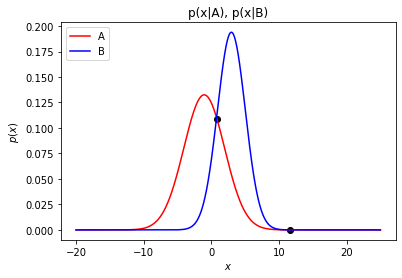

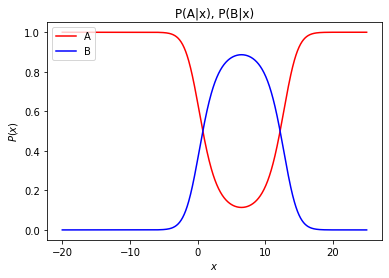

In [33]:
x = np.linspace(-20,25,1000)
# -10과 10 사이의 1000개의 경우를 그래프로 나타낼 것이다.
A_prior, B_prior = 0.5, 0.5   # P(A)= P(B)

X_A, X_B = get_likelihood(x,np.mean(train_A),np.std(train_A),np.mean(train_B),np.std(train_B))
# p(x|A)와 p(x|B)의 값을 구함.

A_X, B_X = get_posterior(x, X_A, X_B, A_prior, B_prior)
# p(x|w)와 P(W)를 알고있으므로 그 값을 이용하여 P(W|x)를 구한다.


#P(x|A) = P(x|B)를 구하기 위해 정규 분포 식을 통해 2차 방정식을 구한다
#위 식에서 공통 부분을 모두 소거하면 likelihood만 남게되는데, 그 likelihood 식을 같다고 두고 방정식을 푼다.
# (1 / (std * np.sqrt(PI * 2))) * np.exp(-(1 / 2) * ((x - mean) / std) * ((x - mean) / std))
# A와 B의 평균과 표준편차에 맞게 값을 대입한 후 지수함수의 형태가 나오는데, 여기서 알고싶은거는 x이므로
# x에 관한 2차 방정식으로 변환하여 하나의 2차 식을 만들 수 있다.
# 그 2차식의 계수를 근의 공식으로 계산하면 교점의 x좌표를 구할 수 있다.
# A는 N(-1,3^2), B는 B(3,2^2)를 따른다고 주어졌으므로 그 값에 맞게 구하였다.

x1 = (+62-math.sqrt(62**2-4*5*(77+72*(np.log(2/3)))))/(2*5)
x2 = (+62+math.sqrt(62**2-4*5*(77+72*(np.log(2/3)))))/(2*5)
dp_y1= pdf(x1,np.mean(train_A),np.std(train_A))
dp_y2= pdf(x2,np.mean(train_A),np.std(train_A))
y_pred=[]

for i in range(len(test_X)):
    if test_X[i] > x2 or test_X[i] < x1:
        y_pred.append(0)
    else: y_pred.append(1)

#위에서 구한 decision_point로 test_X를 예측하여 그 결과를 y_pred에 저장
print(f'Acc: {len(np.where(y_pred == test_Y)[0])/ len(y_pred)}')
#test_Y의 target과 predict한 y_pred한 결과를 비교하여 정확도 계산

#p(x|W) 그래프에 decision_point를 표시
plt.scatter(x1, dp_y1, color='black')
plt.scatter(x2, dp_y2, color='black')


#p(x|A), p(x|B)
plt.title('p(x|A), p(x|B)')
show_pdf(x,X_A,X_B)                               

#P(A|x), P(B|x)
plt.title('P(A|x), P(B|x)')
plt.plot(x, A_X, color='red', label='A')
plt.plot(x, B_X, color='blue', label='B')

plt.legend(loc='upper left')
plt.xlabel("$x$")
plt.ylabel("$P(x)$")
plt.show()


P(A)=1/3, P(B)=2/3일 때

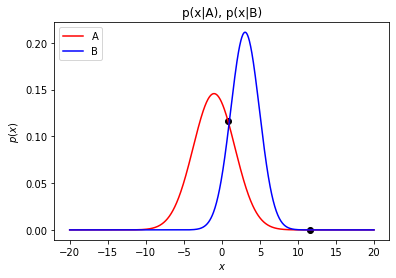

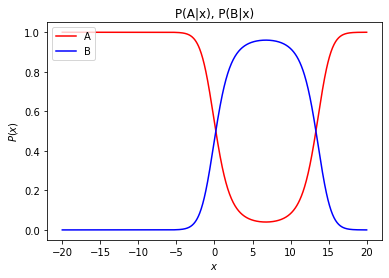

In [34]:
# Train data
train_A, train_B, _, _ = get_data(1000, 1/3, -1, 3, 3, 2)
x = np.linspace(-20,20,1000)
# -10과 10 사이의 1000개의 경우를 그래프로 나타낼 것이다.
A_prior, B_prior = 1/3, 2/3
#P(A) = 1/3, P(B)=2/3
X_A, X_B = get_likelihood(x,np.mean(train_A),np.std(train_A),np.mean(train_B),np.std(train_B))
# p(x|A)와 p(x|B)의 값을 구함.
A_X, B_X = get_posterior(x, X_A, X_B, A_prior, B_prior)
# p(x|w)와 P(W)를 알고있으므로 그 값을 이용하여 P(W|x)를 구한다.

#decision_point 계산

#P(x|A) = P(x|B)를 구하기 위해 정규 분포 식을 통해 2차 방정식을 구한다
#위 식에서 공통 부분을 모두 소거하면 likelihood만 남게되는데, 그 likelihood 식을 같다고 두고 방정식을 푼다.
# (1 / (std * np.sqrt(PI * 2))) * np.exp(-(1 / 2) * ((x - mean) / std) * ((x - mean) / std))
# A와 B의 평균과 표준편차에 맞게 값을 대입한 후 지수함수의 형태가 나오는데, 여기서 알고싶은거는 x이므로
# x에 관한 2차 방정식으로 변환하여 하나의 2차 식을 만들 수 있다.
# 그 2차식의 계수를 근의 공식으로 계산하면 교점의 x좌표를 구할 수 있다.
# A는 N(-1,3^2), B는 B(3,2^2)를 따른다고 주어졌으므로 그 값에 맞게 구하였다.

x1 = (+62-math.sqrt(62**2-4*5*(77+72*(np.log(2/3)))))/(2*5)
x2 = (+62+math.sqrt(62**2-4*5*(77+72*(np.log(2/3)))))/(2*5)
dp_y1= pdf(x1,np.mean(train_A),np.std(train_A))
dp_y2= pdf(x2,np.mean(train_A),np.std(train_A))
y_pred=[]

for i in range(len(test_X)):
    if test_X[i] >  x2 or test_X[i] < x1:
        y_pred.append(0)
    else: y_pred.append(1)

#p(x|W) 그래프에 decision_point를 표시
plt.scatter(x1, dp_y1, color='black')
plt.scatter(x2, dp_y2, color='black')



#p(x|A), p(x|B)
plt.title('p(x|A), p(x|B)')
show_pdf(x,X_A,X_B)                               

#P(A|x), P(B|x)
plt.title('P(A|x), P(B|x)')
plt.plot(x, A_X, color='red', label='A')
plt.plot(x, B_X, color='blue', label='B')

plt.legend(loc='upper left')
plt.xlabel("$x$")
plt.ylabel("$P(x)$")
plt.show()

P(A|X)=P(B|X)를 통해 decision_point를 찾았으면, 그 decision_point x1과 x2를 기준으로 x 값이 그 사이에 있으면 B, x 값이 크거나 작으면 A로 분류할 수 있다.